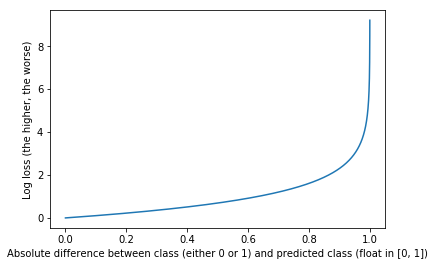

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import log_loss
%matplotlib inline

step = 0.0001
scores = np.arange(0, 1, step)
y_true = np.ones(len(scores))

# scores = np.logspace(0, 1, num=100, endpoint=True, base=10.0)/10.0
# print(scores)

vals = [log_loss([0], [s], labels=[0, 1]) for s in scores]
# vals = log_loss(y_true, scores, labels=[0, 1])
# print(vals)

plt.plot(scores, vals)  #, marker='.')
# plt.ylim([0, 10])
plt.xlabel('Absolute difference between class (either 0 or 1) and predicted class (float in [0, 1])')
plt.ylabel('Log loss (the higher, the worse)')
plt.show()

y_true
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


ROC curves


all outliers. predictions: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
X (fpr)  Y (tpr)  th
    0.0      0.0   2
    1.0      1.0   1


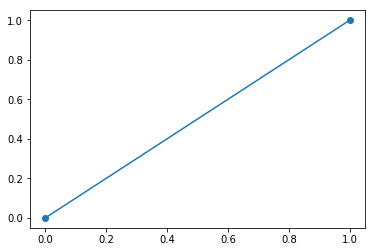


exact dist:. predictions: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
X (fpr)  Y (tpr)  th
    0.0      0.0   2
    0.0      1.0   1
    1.0      1.0   0


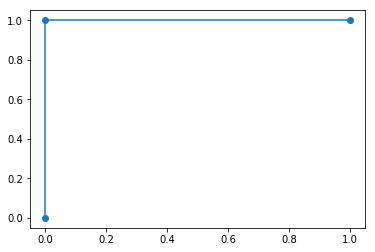


linear_calib_preds. predictions: [0.9, 0.8, 0.8, 0.7, 0.7, 0.7, 0.6, 0.6, 0.6, 0.6, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
X (fpr)  Y (tpr)   th
0.000000      0.0  1.9
0.000000      0.1  0.9
0.000000      0.3  0.8
0.000000      0.6  0.7
0.000000      1.0  0.6
0.111111      1.0  0.5
0.244444      1.0  0.4
0.400000      1.0  0.3
0.577778      1.0  0.2
0.777778      1.0  0.1
1.000000      1.0  0.0


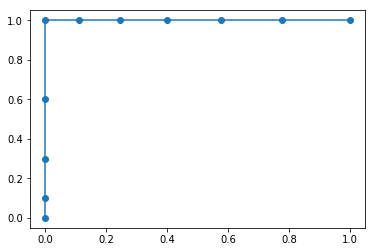


linear_preds. predictions: [0.9        0.88333333 0.86666667 0.85       0.83333333 0.81666667
 0.8        0.78333333 0.76666667 0.75       0.73333333 0.71666667
 0.7        0.68333333 0.66666667 0.65       0.63333333 0.61666667
 0.6        0.58333333 0.56666667 0.55       0.53333333 0.51666667
 0.5        0.48333333 0.46666667 0.45       0.43333333 0.41666667
 0.4        0.38333333 0.36666667 0.35       0.33333333 0.31666667
 0.3        0.28333333 0.26666667 0.25       0.23333333 0.21666667
 0.2        0.18333333 0.16666667 0.15       0.13333333 0.11666667
 0.1        0.08333333 0.06666667 0.05       0.03333333 0.01666667
 0.        ]
X (fpr)  Y (tpr)        th
0.000000      0.0  1.900000
0.000000      0.1  0.900000
0.000000      0.2  0.883333
0.000000      0.3  0.866667
0.000000      0.4  0.850000
0.000000      0.5  0.833333
0.000000      0.6  0.816667
0.000000      0.7  0.800000
0.000000      0.8  0.783333
0.000000      0.9  0.766667
0.000000      1.0  0.750000
0.022222      1.0  0.

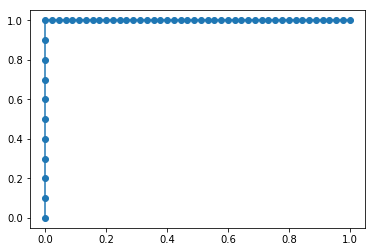

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc


y_true = [1] + 2*[1] + 3*[1] + 4*[1] + 5*[0] + 6*[0] + 7*[0] + 8*[0] + 9*[0] + 10*[0]
print('y_true')
print(y_true)
print()

data = {
    'all outliers': len(y_true) * [1],
    'exact dist:': list(y_true),
    'linear_calib_preds': [.9] + 2*[.8] + 3*[.7] + 4*[.6] + 5*[0.5] + 6*[0.4] + 7*[0.3] + 8*[0.2] + 9*[0.1] + 10*[0],
    'linear_preds': np.linspace(.9, 0, len(y_true), endpoint=True)
    'linear_preds_rnd': np.linspace(.9, 0, len(y_true), endpoint=True) + np.random.randint()
    #    'uncalibrated': [.5] + 2*[.6] + 3*[.7] + 4*[.8] + 5*[0.9] + 6*[0.0] + 7*[0.1] + 8*[0.2] + 9*[0.3] + 10*[0.4]
}

gaus_preds = []
# print(data['linear_preds'])


print('\nROC curves')
print()
# with plotparams({'figure.figsize': (10, 10)}):
for name, values in data.items():
    fpr, tpr, thresholds = roc_curve(y_true, values, drop_intermediate=False)
    print("\n%s. predictions: %s" % (name, str(values)))
    print(pd.DataFrame({'X (fpr)': fpr, 'Y (tpr)': tpr, 'th': thresholds}).sort_values(['X (fpr)']).to_string(index=False))
#     print(values)
#     for x, y, th in zip(fpr, tpr, thresholds):
#         print("%s: (%.2f, %.2f)" % (th, x, y))
    plt.plot(fpr, tpr, label=name + 'AUC: %f' % auc(fpr, tpr), marker='o')
    plt.show()
#     print()

# plt.ylabel('inliers correctly classified as inliers (divided by total inliers)')
# plt.xlabel('outliers NOT correctly classified as outliers (divided by total outliers)')
# plt.legend()
# plt.show()
